# Data Preparation with Python: Practice Exercises with Solutions

The objective of this practice session is to help you learn applying commonly used data preparation steps on the raw dataset in Python.

Suppose it is November 2009 and you wish to sell your copy of MarioKart for the Nintendo Wii on eBay. You are curious how much people is willing to pay for this particular game and therefore you scrape all the eBay auctions from the previous month.

### Data Overview - Mario Kart auctions from eBay

The data, collected in October 2009, has the following variables:

- **`id`**: Numeric, Auction ID assigned by eBay.

- **`duration`**: Numeric, Auction length, in days.

- **`n_bids`**: Numeric, Number of bids.

- **`cond`**: Binary, Game condition, either new or used.

- **`start_pr`**: Numeric, Start price of the auction.

- **`ship_pr`**: Numeric, Shipping price.

- **`total_pr`**: Numeric, Total price, which equals the auction price plus the shipping price.

- **`ship_sp`**: Categorical, Shipping speed or method.

- **`seller_rate`**: Numeric, The seller's rating on eBay. This is the number of positive ratings minus the number of negative ratings for the seller.

- **`stock_photo`**: Binary, Whether the auction feature photo was a stock photo or not. If the picture was used in many auctions, then it was called a stock photo.

- **`wheels`**: Numeric, Number of Wii wheels included in the auction. These are steering wheel attachments to make it seem as though you are actually driving in the game. When used with the controller, turning the wheel actually causes the character on screen to turn.

- **`title`**: String, The title of the auctions.

The modified dataset is available as a CSV file named `mariokart.csv` and can be downloaded from [here](https://raw.githubusercontent.com/imranture/practice_stats/main/datasets/mariokart.csv). 

**Exercise 0**: Read in the dataset as `df` and display the first 10 rows. How many rows and columns are there?

In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd

df = pd.read_csv('datasets/mariokart.csv')
print(f'There are {df.shape[0]} rows and {df.shape[1]} columns')

There are 145 rows and 12 columns


**Exercise 1**:  Display 5 randomly sampled rows and make sure that the variable types match the data descriptions outlined in the Data Overview above.

In [2]:
df.sample(5)

,id,duration,n_bids,cond,start_pr,ship_pr,total_pr,ship_sp,seller_rate,stock_photo,wheels,title
103,4.000000e+11,1.0,1.0,new,54.99,11.45,66.44,upsGround,118345,yes,2,MARIO KART WITH WII WHEEL+1 GT PRO PINK WII WH...
94,2.300000e+11,7.0,15.0,used,12.00,0.00,46.00,priority,15,yes,1,Mario Kart Wii WITH BONUS WHEEL!!!!!
27,3.000000e+11,3.0,5.0,used,0.99,0.00,36.00,upsGround,15,yes,0,Mario Kart Wii (Wii)
56,2.300000e+11,7.0,10.0,used,0.99,4.00,40.06,firstClass,4473,no,1,Mario Kart Wii (Wii) - Comes with Wheel - Used
52,1.800000e+11,3.0,16.0,used,0.99,0.00,36.00,standard,2046,no,1,Mario Kart Wii Nintendo Wii Game &amp; Wheel


In [3]:
df.dtypes

id             float64
duration       float64
n_bids         float64
cond            object
start_pr       float64
ship_pr        float64
total_pr       float64
ship_sp         object
seller_rate      int64
stock_photo     object
wheels           int64
title           object
dtype: object

**Exercise 2**: Generate summary statistics of `df`. 

**Hint**: Use the `describe()` method with `include = np.number` and `include = np.object`.

In [4]:
import numpy as np

df.describe(include = np.number).round(2)  # numerical features

,id,duration,n_bids,start_pr,ship_pr,total_pr,seller_rate,wheels
count,1.450000e+02,144.00,144.00,145.00,145.00,143.00,145.00,145.00
mean,2.224828e+11,3.78,13.53,8.67,3.10,49.88,15988.64,1.13
std,8.785990e+10,2.58,5.86,14.99,3.21,25.69,51549.24,0.85
min,1.100000e+11,1.00,1.00,0.01,0.00,28.98,0.00,0.00
25%,1.400000e+11,1.00,10.00,0.99,0.00,41.18,115.00,0.00
50%,2.110000e+11,3.00,14.00,1.00,2.99,46.50,820.00,1.00
75%,2.900000e+11,7.00,17.00,10.00,4.00,53.99,4858.00,2.00
max,4.000000e+11,10.00,29.00,69.95,25.51,326.51,270144.00,4.00


In [5]:
df.describe(include = object)  # categorical features

,cond,ship_sp,stock_photo,title
count,145,144,145,144
unique,2,8,2,82
top,used,standard,yes,BRAND NEW NINTENDO MARIO KART WITH 2 WHEELS
freq,85,34,105,23


**Exercise 3**: Plot a histogram of `total_pr` with 30 bins to see the distribution. What do you notice?

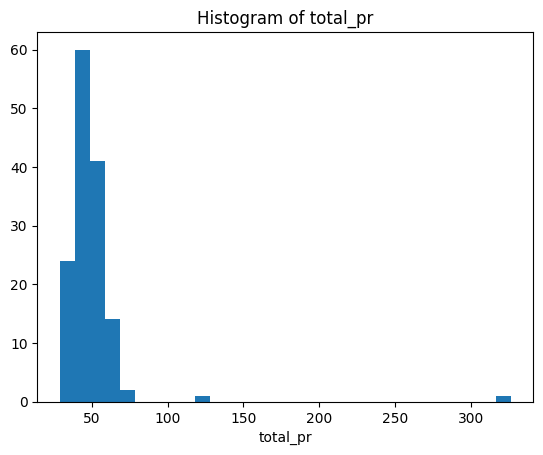

In [6]:
import matplotlib.pyplot as plt

plt.hist(df['total_pr'], bins = 30)
plt.xlabel('total_pr')
plt.title('Histogram of total_pr')
plt.show();

There seems to be 2 possible outliers. Dealing with outliers can be tricky and the solutions depend on the problem you will be working on. Before we decide what to do, let's explore those possible outliers:

In [7]:
df[df['total_pr'] > 100]

,id,duration,n_bids,cond,start_pr,ship_pr,total_pr,ship_sp,seller_rate,stock_photo,wheels,title
19,1.100000e+11,7.0,22.0,used,1.00,25.51,326.51,parcel,115,no,2,Nintedo Wii Console Bundle Guitar Hero 5 Mario...
64,1.300000e+11,3.0,27.0,used,6.95,4.00,118.50,parcel,41,no,0,"10 Nintendo Wii Games - MarioKart Wii, SpiderM..."


Notice that the `title` for Row 19 is "Nintedio Wii Console...". This means this auction included the game console and other game in a bundle. That might explain why this auction sold at a higher price. Meanwhile, Row 64 apparently was a sale which contains 9 other Nintendo Wii games besides MarioKart. It is also reasonable why it had a higher selling price.

Based on these, should we remove or keep these rows? It depends on the objective of your statistical modelling! Say, we aim to develop an analytic model to predict the price of MarioKart only (and maybe bundled with the wheels). In this case, removing Row 19 and Row 64 would be better since these observations include other products. 

In conclusion, let's remove Row 19 and Row 64. In general, if we do not have additional information, it is safer to remove outliers.

In [8]:
df = df[df['total_pr'].notna() < 100]

**Exercise 4**: Are there any ID-like column(s)? If there are, remove them. Why should we remove ID-like columns?

The dataset has two ID-like columns: `id` and `title`. Such variables are irrelevant in statistical modeling and 
they must be removed.

In [9]:
df = df.drop(['id', 'title'], axis = 1)
df.head()

,duration,n_bids,cond,start_pr,ship_pr,total_pr,ship_sp,seller_rate,stock_photo,wheels
0,3.0,20.0,new,0.99,4.00,51.55,standard,1580,yes,1
1,7.0,13.0,used,0.99,3.99,37.04,firstClass,365,yes,1
2,3.0,16.0,new,0.99,3.50,45.50,firstClass,998,no,1
3,3.0,18.0,new,0.99,0.00,44.00,standard,7,yes,1
4,1.0,20.0,new,0.01,0.00,71.00,media,820,yes,2


**Exercise 5**: Are there any missing values?

In [10]:
df.isna().sum()

duration       1
n_bids         1
cond           0
start_pr       0
ship_pr        0
total_pr       2
ship_sp        1
seller_rate    0
stock_photo    0
wheels         0
dtype: int64

**Exercise 6**: Identify the row(s) with missing values. 

In [11]:
df[df.isna().any(axis = 1)] 

,duration,n_bids,cond,start_pr,ship_pr,total_pr,ship_sp,seller_rate,stock_photo,wheels
91,5.0,12.0,new,0.99,0.0,NaN,standard,567,no,0
128,NaN,NaN,used,0.99,0.0,NaN,NaN,44312,no,0


**Exercise 7**: Remove the row(s) with missing values and make sure there are no missing values left.

In [12]:
df = df.dropna()
df.shape[0]

143

In [13]:
df.isnull().sum()

duration       0
n_bids         0
cond           0
start_pr       0
ship_pr        0
total_pr       0
ship_sp        0
seller_rate    0
stock_photo    0
wheels         0
dtype: int64

**Exercise 8**: `seller_rate` is the number of positive reviews minus the number of negative reviews. Discretize the numerical variable, `seller_rate` and make it a categorical variable with 5 categories: *very low*, *low*, *medium*, *high* and *very high*.

In [14]:
df['seller_rate'] = pd.qcut(df['seller_rate'], q = 5, labels=['very low', 'low', 'medium', 'high', 'very high'])
df.head(5)

,duration,n_bids,cond,start_pr,ship_pr,total_pr,ship_sp,seller_rate,stock_photo,wheels
0,3.0,20.0,new,0.99,4.00,51.55,standard,high,yes,1
1,7.0,13.0,used,0.99,3.99,37.04,firstClass,medium,yes,1
2,3.0,16.0,new,0.99,3.50,45.50,firstClass,medium,no,1
3,3.0,18.0,new,0.99,0.00,44.00,standard,very low,yes,1
4,1.0,20.0,new,0.01,0.00,71.00,media,medium,yes,2


Let's make sure we performed the dicretization correctly using the value_counts method in Pandas.

In [15]:
df['seller_rate'].value_counts()

seller_rate
high         32
very low     30
medium       29
low          27
very high    25
Name: count, dtype: int64

**Exercise 9**: Perform integer encoding for `seller_rate` such that *very low* is 0, *low* is 1, *medium* is 2, *high* is 3 and *very high* is 4.

In [16]:
level_mapping = {'very low': 0, 'low': 1, 'medium': 2, 'high': 3, 'very high': 4}
df['seller_rate'] = df['seller_rate'].replace(level_mapping)

df.head(5)

,duration,n_bids,cond,start_pr,ship_pr,total_pr,ship_sp,seller_rate,stock_photo,wheels
0,3.0,20.0,new,0.99,4.00,51.55,standard,3,yes,1
1,7.0,13.0,used,0.99,3.99,37.04,firstClass,2,yes,1
2,3.0,16.0,new,0.99,3.50,45.50,firstClass,2,no,1
3,3.0,18.0,new,0.99,0.00,44.00,standard,0,yes,1
4,1.0,20.0,new,0.01,0.00,71.00,media,2,yes,2


**Exercise 10**: Use one hot encoding for the remaining categorical features. How many columns do we have now? Why?

In [17]:
# get the list of categorical descriptive features
categorical_cols = df.columns[df.dtypes == object].tolist()

# if a categorical descriptive feature has only 2 levels,
# define only one binary variable
for col in categorical_cols:
    n = len(df[col].unique())
    if (n == 2):
        df[col] = pd.get_dummies(df[col], drop_first=True)
    
# for other categorical features (with > 2 levels), 
# use regular one-hot-encoding 
# if a feature is numeric, it will be untouched
df = pd.get_dummies(df)

df.head()

,duration,n_bids,cond,start_pr,ship_pr,total_pr,stock_photo,wheels,ship_sp_firstClass,ship_sp_media,...,ship_sp_parcel,ship_sp_priority,ship_sp_standard,ship_sp_ups3Day,ship_sp_upsGround,seller_rate_0,seller_rate_1,seller_rate_2,seller_rate_3,seller_rate_4
0,3.0,20.0,False,0.99,4.00,51.55,True,1,False,False,...,False,False,True,False,False,False,False,False,True,False
1,7.0,13.0,True,0.99,3.99,37.04,True,1,True,False,...,False,False,False,False,False,False,False,True,False,False
2,3.0,16.0,False,0.99,3.50,45.50,False,1,True,False,...,False,False,False,False,False,False,False,True,False,False
3,3.0,18.0,False,0.99,0.00,44.00,True,1,False,False,...,False,False,True,False,False,True,False,False,False,False
4,1.0,20.0,False,0.01,0.00,71.00,True,2,False,True,...,False,False,False,False,False,False,False,True,False,False


In [18]:
print(f'There are {df.shape[0]} rows and {df.shape[1]} columns.')
print('One hot encoding creates a column for each level of the categorical feature, however when there is a binary class we can encode it as 0 or 1.')

There are 143 rows and 21 columns.
One hot encoding creates a column for each level of the categorical feature, however when there is a binary class we can encode it as 0 or 1.
